Import all needed libraries

In [1]:
import requests
import urllib.parse
import urllib.request
import csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Set configuration
* __host__        - API host
* __dataset_doi__ - DOI of your dataset
* __file_name__   - Name of the file that contain the date you need to view
* __column__      - Name of the column containing the date that will appear in the chart

In [2]:
host = 'https://sandbox.datadryad.org' # IMPORTANT! Change to https://datadryad.org for real datasets
dataset_doi = 'doi:10.7959/dryad.h70rxwddz'
file_name = 'aTable.csv'
column = 'rutabaga'

Retrieve last version of your dataset

In [3]:
url = f'{host}/api/v2/datasets/{urllib.parse.quote(dataset_doi, safe='')}'
response = requests.get(url) 
last_version_url = response.json()['_links']['stash:version']['href']

Retrieve the list of files

In [4]:
url = f'{host}{last_version_url}/files'
response = requests.get(url)
files = response.json()

Select specified file by name

In [5]:
file_json = None
for f in files['_embedded']['stash:files']:
    if f['path'] == file_name:
        file_json = f

if file_json == None:
    raise SystemExit('File not found')

Parse CSV file and retrieve specified column data 

In [6]:
download_url = f'{host}{file_json['_links']['stash:download']['href']}'
df = pd.read_csv(download_url, usecols=[column])
column_values = df.values.flatten()

if column_values.size == 0:
    raise SystemExit(f'Column "{column}" does not contain any values')

Show colum data in Bar chart format

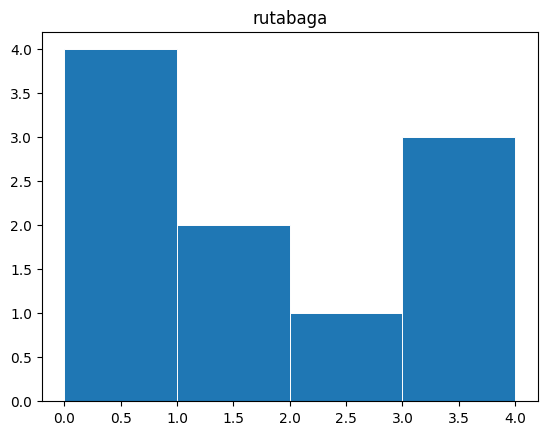

In [7]:
if file_json and column_values.size > 0:
    x = 0.5 + np.arange(column_values.size)
    y = column_values
    
    plt.title(column)
    plt.bar(x, y, width=1, edgecolor="white", linewidth=0.7)
    
    plt.show()